# Input de dados - ic_infmo_renda  
### Desenvolvimento de modelos visando a inferência de valores em variáveis contendo `NaN` (nulo)
- Variáveis:
    - ic_sexo
    - ic_tipo_renda
    - ic_infmo_renda
    - dt_apuracao_renda

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from IPython.display import Image
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
# Ler o arquivo
# Resultado do 01.1_tratamento_filtros_dados_renda.ipynb
df_renda = pd.read_csv("../../../dados/amostra_sicli_tratada/cli_renda_amostra_regras_tratamento.csv", sep=';')
df_renda.shape

(2382027, 13)

In [4]:
df_renda.columns

Index(['nu_pessoa', 'dt_nascimento', 'ic_tipo_renda', 'vr_renda_bruta',
       'vr_renda_liquida', 'ic_infmo_renda', 'dt_apuracao_renda', 'ic_sexo',
       'ic_situacao', 'ic_inconsistencia', 'nu_estdo_civil_p27', 'idade',
       'valido'],
      dtype='object')

In [5]:
# Definição das features (inputs) e label (target)
# features e label ic_infmo_renda
features_infmo_renda = ['vr_renda_bruta', 'vr_renda_liquida', #'dt_nascimento', 
            'dt_apuracao_renda', 'ic_sexo', 'ic_tipo_renda',
            'ic_situacao', 'nu_estdo_civil_p27', 'idade']
label_infmo_renda = ['ic_infmo_renda']

 ### Quantitativo de dados válidos e inválidos

In [6]:
df_validos   = df_renda[df_renda['valido'] == True]
df_invalidos = df_renda[df_renda['valido'] == False]

print('Válidos:   ', df_validos.shape)
print('Inválidos: ', df_invalidos.shape)

Válidos:    (1221998, 13)
Inválidos:  (1160029, 13)


# ic_sexo

In [7]:
print('Válidos:')
print(df_validos['ic_sexo'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_sexo'].value_counts())

Válidos:
M    617715
F    603686
?       597
Name: ic_sexo, dtype: int64
Inválidos:
M    629606
F    526174
?      4249
Name: ic_sexo, dtype: int64


### Inconsistências em ic_sexo
- `? = 597` nos registros válidos
- `? = 4249` nos registros inválidos
- Total: `4846` inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_sexo_treino contendo os `M` e `F` válidos que serão usados para treino e validação.
    - df_ic_sexo_inferir contendo os `4846` registros que serão inferidos pelo modelo treinado.

# ic_tipo_renda

In [8]:
print('Válidos:')
print(df_validos['ic_tipo_renda'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_tipo_renda'].value_counts())

Válidos:
F    729319
I    492679
Name: ic_tipo_renda, dtype: int64
Inválidos:
?    658335
F    398215
I    103479
Name: ic_tipo_renda, dtype: int64


### Inconsistências em ic_tipo_renda
- `? = 658335` registros inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_tipo_renda_treino contendo os `F` e `I` válidos que serão usados para treino e validação.
    - df_ic_tipo_renda_inferir contendo os `658335` registros que serão inferidos pelo modelo treinado.

# ic_infmo_renda

In [9]:
df_validos['ic_infmo_renda']   = df_validos['ic_infmo_renda'].astype('int32')
df_invalidos['ic_infmo_renda'] = df_invalidos['ic_infmo_renda'].astype('int32')
print('Válidos:')
print(df_validos['ic_infmo_renda'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_infmo_renda'].value_counts())

Válidos:
2    538634
6    344764
3    292274
5     46326
Name: ic_infmo_renda, dtype: int64
Inválidos:
0    658335
5    221813
3    106344
6     92123
2     81414
Name: ic_infmo_renda, dtype: int64


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Inconsistências em ic_infmo_renda
- `0.0 = 658335` registros inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_infmo_renda_treino contendo os registros válidos que serão usados para treino e validação.
    - df_ic_infmo_renda_inferir contendo os `658335` registros que serão inferidos pelo modelo treinado.

In [10]:
# registros consistentes
df_ic_infmo_renda_treino  = df_validos

# registros INCONSISTENTES
df_ic_infmo_renda_inferir = df_invalidos[df_invalidos['ic_infmo_renda'] == 0]
print('Treino:  ', df_ic_infmo_renda_treino.shape)
print('Inferir: ', df_ic_infmo_renda_inferir.shape)

Treino:   (1221998, 13)
Inferir:  (658335, 13)


# dt_apuracao_renda

In [11]:
print('Válidos:')
print((df_validos['dt_apuracao_renda'] == 0).value_counts())
print('Inválidos:')
print((df_invalidos['dt_apuracao_renda'] == 0).value_counts())

Válidos:
False    1221998
Name: dt_apuracao_renda, dtype: int64
Inválidos:
True     767164
False    392865
Name: dt_apuracao_renda, dtype: int64


### Inconsistências em dt_apuracao_renda
- Em **Inválidos** `True = 767164` são registros **inconsistentes**, no caso sem dt_apuracao_renda
- Serão separados os registros em dois conjuntos de dados
    - df_dt_apuracao_renda_treino contendo os registros válidos que serão usados para treino e validação.
    - df_dt_apuracao_renda_inferir contendo os `767164` registros que serão inferidos pelo modelo treinado.

In [12]:
df_features = df_ic_infmo_renda_treino[features_infmo_renda]
df_label    = df_ic_infmo_renda_treino[label_infmo_renda]

print(df_features.shape)
print(df_label.shape)

(1221998, 8)
(1221998, 1)


# Gera amostragem conforme a calculadora:  
- https://www.solvis.com.br/calculos-de-amostragem/  

- **Calculadora 2**
    - População: 1.741.828
    - Margem de erro (%): 1
    - Confiabilidade (%): 99
    - Tamanho da Amostra: 16419
        - Será usada aproximadamente a metade dessa proporção por questões de tempo computacional.

In [13]:
df_features

,vr_renda_bruta,vr_renda_liquida,dt_apuracao_renda,ic_sexo,ic_tipo_renda,ic_situacao,nu_estdo_civil_p27,idade
0,0.00,0.00,201710,F,I,1,9,66
1,975.00,897.00,201709,M,F,1,9,34
2,1530.00,1407.60,201709,M,F,1,9,34
3,0.00,0.00,201511,M,I,1,9,52
4,0.00,0.00,201702,F,I,1,1,47
...,...,...,...,...,...,...,...,...
1221993,0.00,0.00,201412,M,I,1,1,24
1221994,0.00,0.00,201603,F,I,1,9,53
1221995,978.58,978.58,201509,F,F,1,9,55
1221996,788.00,788.00,201510,M,F,1,1,29


||Variáveis Usadas na Estratificada||
|---|---|---|
|**ic_infmo_renda**|**ic_tipo_renda**|**ic_tipo_renda & ic_infmo_renda**|
|--------------------------|--------------------------|--------------------------|
|**ic_sexo**|**ic_sexo**|**ic_sexo**|
|M - 4331 | **F - 4344** | M - 4420|
|F - 4219 | **M - 4206** | F - 4130|
||||
|**ic_tipo_renda**|**ic_tipo_renda**|**ic_tipo_renda**|
|F - 5180 | **F - 5102** | F - 5101|
|I - 3370 | **I - 3448** | I - 3449|
||||
|**ic_infmo_renda**|**ic_infmo_renda**|**ic_infmo_renda**|
|2.0 - 3769 | **2.0 - 3795** | 2.0 - 3768|
|6.0 - 2412 | **6.0 - 2357** | 6.0 - 2413|
|3.0 - 2045 | **3.0 - 2089** | 3.0 - 2045| 
|5.0 - 324 | **5.0 - 309** | 5.0 - 324|  

- Foi observado que a amostragem estratificada por `ic_tipo_renda` deixou `ic_sexo = F` em maior proporção.
    - Originalmente a maioria é do sexo masculino.
- Isso é interessante porque o desbalaneamento da variável `ic_sexo` está, então, no fato da renda ser formal ou informal.
- Portanto, a estratificação será feita por `ic_tipo_renda`, pois mantem um melhor equilibrio entre `ic_sexo = M` e `ic_sexo = F`.

In [14]:
# Amostra extratificada
from sklearn.model_selection import train_test_split

X, y = df_features[features_infmo_renda], df_label[label_infmo_renda]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.007, #0.013441941, 
                                                    random_state=84,
                                                    #shuffle=True) # Faz embaralhamento deixando a aleatoriedade ainda maior
                                                    #stratify=y) 
                                                    stratify=X['ic_tipo_renda'])
                                                    # y = df_label[[label_infmo_renda]

del X_train
del y_train

#print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8554, 8) (8554, 1)


#### `X` e `y` correspondem as variáveis independentes e dependente, respectivamente.

In [15]:
X = X_test
y = y_test

del X_test, y_test

print(X.shape,y.shape)

(8554, 8) (8554, 1)


Essa amostra será dividida no conjunto de dados para o `treino` e `teste`

## Quantitativo por variáveis categóricas

In [16]:
print('ic_infmo_renda:')
print(y['ic_infmo_renda'].value_counts())

print('ic_sexo:')
print(X['ic_sexo'].value_counts())

print('ic_tipo_renda:')
print(X['ic_tipo_renda'].value_counts())

ic_infmo_renda:
2    3711
6    2476
3    2035
5     332
Name: ic_infmo_renda, dtype: int64
ic_sexo:
M    4327
F    4223
?       4
Name: ic_sexo, dtype: int64
ic_tipo_renda:
F    5105
I    3449
Name: ic_tipo_renda, dtype: int64


### Quantidade de registros por ic_infmo_renda

In [17]:
y['ic_infmo_renda'].value_counts()

2    3711
6    2476
3    2035
5     332
Name: ic_infmo_renda, dtype: int64

In [18]:
# Divisão do dataset em porções train e test.
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.33,
                      random_state=42,
                      #shuffle=True)
                      stratify=y)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5731, 8) (5731, 1)
(2823, 8) (2823, 1)


- 11000 amostras para o treinamento dos modelos
- 5419 amostras para a validação da acurácia dos modelos

# Transforma em números (encoding) as variáveis categóricas

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
### ic_sexo 1 = M e 0 = F ###
###################################
le = le.fit(X_train['ic_sexo'])
X_train['ic_sexo'] = le.transform(X_train['ic_sexo'])

# aplica no y_test
le = le.fit(X_test['ic_sexo'])
X_test['ic_sexo'] = le.transform(X_test['ic_sexo'])

### encoding das variáveis categóricas ###
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X_train['ic_tipo_renda'])
X_train['ic_tipo_renda'] = le.transform(X_train['ic_tipo_renda'])

# aplica no X_test
le = le.fit(X_test['ic_tipo_renda'])
X_test['ic_tipo_renda'] = le.transform(X_test['ic_tipo_renda'])


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

## Bibliotecas usadas na preparação, treinamento e na validação

In [20]:
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Aprendizado Supervisionado - Classificação

### Algoritmos de Classificação

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

### Parâmetros de configuração da validação por KFold

Definição de quantidade de folds, definição da seed a ser utilizada, e definição da métrica de avaliação. K-fold é um método de treinamento a ser usado em conjuntos de dados de tamanho moderado devido ao seu treinamento consumir bastante tempo.  

Referência: 
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [22]:
num_folds = 10
seed = 42
scoring = 'accuracy'

# Pipeline de avaliação de desempenho de algoritmos  
### Classificação Supervisionada

In [23]:
# Verificação do score de cada algoritmo. Avaliação de desempenho de cada modelo.
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)))
#models.append(('SVM', LinearSVC()))
models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=0.2)))
models.append(('ADT', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                         algorithm="SAMME",
                                         n_estimators=200)))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.841389 (0.018380)
LDA: 0.708776 (0.016890)
KNN: 0.896007 (0.010841)
CART: 0.890948 (0.010908)
NB: 0.859187 (0.017402)
RF: 0.834236 (0.016194)
SVM: 0.433782 (0.021936)
ADT: 0.895830 (0.013058)


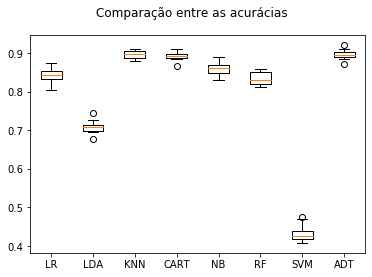

In [24]:
# Visualização das acurácias dos diferentes modelos.
fig = pyplot.figure()
fig.suptitle('Comparação entre as acurácias')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [25]:
# Padronização do dataset, utilizando StandardScaler
# Aplica normalização por z-score
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_jobs=-1))])))
pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(max_depth=2, 
                                                                                             random_state=0, 
                                                                                             n_jobs=-1))])))
#pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', LinearSVC())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(kernel='rbf', 
                                                                            gamma=0.7, 
                                                                            C=0.2))])))
pipelines.append(('ADT', Pipeline([('Scaler', StandardScaler()),('ADT', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                                                                           algorithm="SAMME",
                                                                                           n_estimators=200))])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.880825 (0.013458)
LDA: 0.708776 (0.016890)
KNN: 0.861284 (0.019194)
CART: 0.890947 (0.009104)
NB: 0.845227 (0.016504)
RF: 0.834236 (0.016194)
SVM: 0.857795 (0.016350)
ADT: 0.895830 (0.013058)


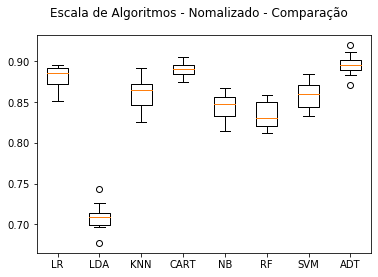

In [26]:
# Visualização das acurácias dos diferentes modelos pós-normalização do dataset.
fig = pyplot.figure()
fig.suptitle('Escala de Algoritmos - Nomalizado - Comparação')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Otimização de parâmetros dos modelos selecionados
- KNN
- AdaBoost CART
- Logistic Regression

# KNN

In [28]:
# Ajuste de parâmetros do modelo KNN. Tuning
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier(n_jobs=-1)

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

#grid_result = grid.fit(rescaledX, y_train)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.900020 using {'n_neighbors': 7}
0.873669 (0.012714) with: {'n_neighbors': 1}
0.864251 (0.012798) with: {'n_neighbors': 2}
0.893913 (0.010111) with: {'n_neighbors': 3}
0.889900 (0.010650) with: {'n_neighbors': 4}
0.896007 (0.010841) with: {'n_neighbors': 5}
0.894264 (0.010880) with: {'n_neighbors': 6}
0.900020 (0.009723) with: {'n_neighbors': 7}
0.897577 (0.012559) with: {'n_neighbors': 8}
0.898972 (0.011277) with: {'n_neighbors': 9}
0.899670 (0.010018) with: {'n_neighbors': 10}
0.898798 (0.010827) with: {'n_neighbors': 11}
0.899147 (0.011710) with: {'n_neighbors': 12}
0.898623 (0.010319) with: {'n_neighbors': 13}
0.899146 (0.009821) with: {'n_neighbors': 14}
0.898450 (0.011959) with: {'n_neighbors': 15}
0.899845 (0.010718) with: {'n_neighbors': 16}
0.898100 (0.010796) with: {'n_neighbors': 17}


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# AdaBoost(CART)

In [29]:
# Ajuste de parâmetros do modelo ADT - AdaBoost Decison Tree Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators = [250, 255, 260, 265, 270]
learning_rate = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6]
algorithm = ['SAMME', 'SAMME.R']
param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best: 0.897573 using {'algorithm': 'SAMME.R', 'learning_rate': 0.53, 'n_estimators': 250}
0.873142 (0.029487) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 250}
0.873142 (0.029487) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 255}
0.873142 (0.029487) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 260}
0.877156 (0.029997) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 265}
0.877156 (0.029997) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 270}
0.871223 (0.034165) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 250}
0.871571 (0.034435) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 255}
0.867208 (0.033004) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 260}
0.867034 (0.032858) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 265}
0.871223 (0.034165) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_est

# Logistic Regression

In [30]:
# Ajuste de parâmetros do modelo Logistic Regression Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

solver = ['newton-cg','lbfgs','liblinear','sag','saga']

param_grid = dict(solver=solver)

model = LogisticRegression()

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

#grid_result = grid.fit(X_train, y_train)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880127 using {'solver': 'liblinear'}
0.875416 (0.014794) with: {'solver': 'newton-cg'}
0.875591 (0.014955) with: {'solver': 'lbfgs'}
0.880127 (0.014186) with: {'solver': 'liblinear'}
0.872276 (0.014279) with: {'solver': 'sag'}
0.868786 (0.014508) with: {'solver': 'saga'}


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Amostragem de 30%
- Essa amostragem será usada nos modelos que apresentam os melhores resultados
- Os modelos serão configurados com os melhores parâmetros após otimização

In [31]:
df_features = df_ic_infmo_renda_treino[features_infmo_renda]
df_label    = df_ic_infmo_renda_treino[label_infmo_renda]

print(df_features.shape)
print(df_label.shape)

(1221998, 8)
(1221998, 1)


In [32]:
from sklearn.model_selection import train_test_split

X, y = df_features[features_infmo_renda], df_label[label_infmo_renda]
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.3, ## -> 30% será usado para treinar e avaliar
                      random_state=16, # valor das sementes diferente para forçar outra aleatoriedade 
                      #shuffle=True) # Faz embaralhamento deixando a aleatoriedade ainda maior
                      #random_state=33,
                      #stratify=y)
                      stratify=X['ic_tipo_renda'])

X = X_test
y = y_test

del X_train, y_train, X_test, y_test

print (X.shape, y.shape)

(366600, 8) (366600, 1)


# Separar dados de treino e validação

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      #test_size=0.15, # 15% será usado para avaliar
                      test_size=0.3, # 30% será usado para avaliar
                      random_state=51, # valor das sementes diferente para forçar outra aleatoriedade 
                      shuffle=True) # Faz embaralhamento deixando a aleatoriedade ainda maior
                      #random_state=51, 
                      #stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(256620, 8) (256620, 1)
(109980, 8) (109980, 1)


# Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
### ic_sexo 1 = M e 0 = F ###
###################################
le = le.fit(X_train['ic_sexo'])
X_train['ic_sexo'] = le.transform(X_train['ic_sexo'])

# aplica no y_test
le = le.fit(X_test['ic_sexo'])
X_test['ic_sexo'] = le.transform(X_test['ic_sexo'])

### encoding das variáveis categóricas ###
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X_train['ic_tipo_renda'])
X_train['ic_tipo_renda'] = le.transform(X_train['ic_tipo_renda'])

# aplica no X_test
le = le.fit(X_test['ic_tipo_renda'])
X_test['ic_tipo_renda'] = le.transform(X_test['ic_tipo_renda'])


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [35]:
print('qtd 0: ',(y_train == 0).sum())
print('qtd 2: ',(y_train == 2).sum())
print('qtd 6: ',(y_train == 6).sum())
print('qtd 3: ',(y_train == 3).sum())
print('qtd 5: ',(y_train == 5).sum())

qtd 0:  ic_infmo_renda    0
dtype: int64
qtd 2:  ic_infmo_renda    113234
dtype: int64
qtd 6:  ic_infmo_renda    72229
dtype: int64
qtd 3:  ic_infmo_renda    61444
dtype: int64
qtd 5:  ic_infmo_renda    9713
dtype: int64


# Resample

In [ ]:
'''#from imblearn.combine import SMOTEENN
#undersample = SMOTEENN(n_jobs=-1)

from imblearn.combine import SMOTETomek
undersample = SMOTETomek(n_jobs=-1)

X_train, y_train = undersample.fit_resample(X_train, y_train)
X_test, y_test = undersample.fit_resample(X_test, y_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)'''

# Modelos
- KNN
- AdaBoost(CART)
- Naïve Bayes Gaussian
- Logistic Regression
- XGBoost

# KNN

In [36]:
# Modelo final KNN
# Best: 0.904732 using {'n_neighbors': 5}
# Best: 0.909787 using {'n_neighbors': 15}
# Best: 0.900020 using {'n_neighbors': 7}

#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

model_KNN = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)

#model_KNN.fit(rescaledX, y_train)
model_KNN.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
#rescaledValidationX = scaler.transform(X_test)

#predictions = model_KNN.predict(rescaledValidationX)
predictions = model_KNN.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


0.9201400254591744
[[48393    14     0     0]
 [  805 21265     3  4200]
 [    2     1  4149     5]
 [   85  3664     4 27390]]
              precision    recall  f1-score   support

           2       0.98      1.00      0.99     48407
           3       0.85      0.81      0.83     26273
           5       1.00      1.00      1.00      4157
           6       0.87      0.88      0.87     31143

    accuracy                           0.92    109980
   macro avg       0.92      0.92      0.92    109980
weighted avg       0.92      0.92      0.92    109980



# AdaBoost(CART)

In [37]:
# Modelo final AdaBoost Decision Tree Classifier
# Best: 0.900368 using {'algorithm': 'SAMME', 'learning_rate': 0.59, 'n_estimators': 250}
# Best: 0.905600 using {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 250}
# Best: 0.897573 using {'algorithm': 'SAMME.R', 'learning_rate': 0.53, 'n_estimators': 250}

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_ADT =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                algorithm="SAMME.R",
                                learning_rate=0.53,
                                n_estimators=250)

model_ADT.fit(rescaledX, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_ADT.predict(rescaledValidationX)
#predictions = model_RF.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5723949809056192
[[29828 18579     0     0]
 [14350  4788   940  6195]
 [    0  3035   957   165]
 [  729  2018  1017 27379]]
              precision    recall  f1-score   support

           2       0.66      0.62      0.64     48407
           3       0.17      0.18      0.18     26273
           5       0.33      0.23      0.27      4157
           6       0.81      0.88      0.84     31143

    accuracy                           0.57    109980
   macro avg       0.49      0.48      0.48    109980
weighted avg       0.57      0.57      0.57    109980



# Naïve Bayes Gaussian

In [38]:
# Modelo final Naïve Bayes Gaussian Classifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_NBG =  GaussianNB()

model_NBG.fit(rescaledX, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_NBG.predict(rescaledValidationX)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7246681214766321


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[48407     0     0     0]
 [14619     2  6186  5466]
 [    0     0  4152     5]
 [  798     0  3207 27138]]
              precision    recall  f1-score   support

           2       0.76      1.00      0.86     48407
           3       1.00      0.00      0.00     26273
           5       0.31      1.00      0.47      4157
           6       0.83      0.87      0.85     31143

    accuracy                           0.72    109980
   macro avg       0.72      0.72      0.55    109980
weighted avg       0.82      0.72      0.64    109980



# Logistic Regression

In [39]:
# Modelo final Logistic Regression Classifier
# Best: 0.885363 using {'solver': 'liblinear'}
# Best: 0.876288 using {'solver': 'newton-cg'}
# Best: 0.880127 using {'solver': 'liblinear'}

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_LR =  LogisticRegression(solver='liblinear')

model_LR.fit(rescaledX, y_train)
#model_LR.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_LR.predict(rescaledValidationX)
#predictions = model_LR.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) 

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7837788688852518
[[46236  2171     0     0]
 [ 9871  9337   511  6554]
 [   21  1101  2859   176]
 [ 1063  2152   160 27768]]
              precision    recall  f1-score   support

           2       0.81      0.96      0.88     48407
           3       0.63      0.36      0.46     26273
           5       0.81      0.69      0.74      4157
           6       0.80      0.89      0.85     31143

    accuracy                           0.78    109980
   macro avg       0.76      0.72      0.73    109980
weighted avg       0.77      0.78      0.76    109980



# XGBoost

In [40]:
#######################################
# Execução da GPU na linha de comando #
#       watch -n 1 nvidia-smi         #
#######################################

from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
import time

# utilizado para gerar os logs dos erros: merror e mlogloss
eval_set = [(X_train, y_train), (X_test, y_test)]

# métricas de avaliação
eval_metric = ['merror', 'mlogloss']

# Informa a quantidade de classes que serão usadas no treinamento
num_class = 2 #len(y_train.unique())

start = time.time() # inicia o tempo de execução

model_xgb = XGBClassifier(num_class=num_class,
                          objective='multi:softmax', 
                          n_jobs=-1, 
                          nthread=-1, 
                          tree_method='gpu_hist', 
                          gpu_id=-1)

model_xgb = model_xgb.fit(X_train, 
                          y_train, 
                          eval_metric=eval_metric, 
                          eval_set=eval_set, 
                          verbose=True)

elapsed = time.time() - start # informa o tempo de execução


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0]	validation_0-merror:0.08011	validation_0-mlogloss:0.93697	validation_1-merror:0.08085	validation_1-mlogloss:0.93773
[1]	validation_0-merror:0.08059	validation_0-mlogloss:0.70078	validation_1-merror:0.08127	validation_1-mlogloss:0.70220
[2]	validation_0-merror:0.08008	validation_0-mlogloss:0.55021	validation_1-merror:0.08088	validation_1-mlogloss:0.55205
[3]	validation_0-merror:0.07941	validation_0-mlogloss:0.44855	validation_1-merror:0.08036	validation_1-mlogloss:0.45069
[4]	validation_0-merror:0.07877	validation_0-mlogloss:0.37707	validation_1-merror:0.07996	validation_1-mlogloss:0.37954
[5]	validation_0-merror:0.07826	validation_0-mlogloss:0.32563	validation_1-merror:0.07912	validation_1-mlogloss:0.32825
[6]	validation_0-merror:0.07805	validation_0-mlogloss:0.28758	validation_1-merror:0.07881	validation_1-mlogloss:0.29026
[7]	validation_0-merror:0.07788	validation_0-mlogloss:0.26018	validation_1-merror:0.07877	validation_1-mlogloss:0.26311
[8]	validation_0-merror:0.07762	validati

[68]	validation_0-merror:0.06126	validation_0-mlogloss:0.14388	validation_1-merror:0.06549	validation_1-mlogloss:0.15431
[69]	validation_0-merror:0.06102	validation_0-mlogloss:0.14359	validation_1-merror:0.06541	validation_1-mlogloss:0.15418
[70]	validation_0-merror:0.06096	validation_0-mlogloss:0.14344	validation_1-merror:0.06549	validation_1-mlogloss:0.15417
[71]	validation_0-merror:0.06088	validation_0-mlogloss:0.14317	validation_1-merror:0.06541	validation_1-mlogloss:0.15402
[72]	validation_0-merror:0.06082	validation_0-mlogloss:0.14301	validation_1-merror:0.06530	validation_1-mlogloss:0.15401
[73]	validation_0-merror:0.06074	validation_0-mlogloss:0.14289	validation_1-merror:0.06520	validation_1-mlogloss:0.15397
[74]	validation_0-merror:0.06071	validation_0-mlogloss:0.14271	validation_1-merror:0.06525	validation_1-mlogloss:0.15395
[75]	validation_0-merror:0.06070	validation_0-mlogloss:0.14264	validation_1-merror:0.06528	validation_1-mlogloss:0.15396
[76]	validation_0-merror:0.06053

In [41]:
print("GPU tempo de treinamento: %s seconds" % (elapsed))

# cria predições no dataset de teste e
## avalia a acurácia da classificação
acuracia = accuracy_score(y_test, model_xgb.predict(X_test))
print("Acurácia model_xgb: %.2f%%" % (acuracia * 100.0))

predictions = model_xgb.predict(X_test)

#print(accuracy_score(y_test, predictions))
print('\nMatriz de confusão:')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

GPU tempo de treinamento: 23.601639986038208 seconds
Acurácia model_xgb: 93.48%

Matriz de confusão:
[[48407     0     0     0]
 [    0 22235     0  4038]
 [    0     1  4155     1]
 [    0  3135     0 28008]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00     48407
           3       0.88      0.85      0.86     26273
           5       1.00      1.00      1.00      4157
           6       0.87      0.90      0.89     31143

    accuracy                           0.93    109980
   macro avg       0.94      0.94      0.94    109980
weighted avg       0.93      0.93      0.93    109980



# Teste sobre amostra aleatória
- A amostragem aleatória permite testar os modelos e avalia-los com dados que não participaram do treinamento.

In [66]:
df_features = df_ic_infmo_renda_treino[features_infmo_renda]
df_label    = df_ic_infmo_renda_treino[label_infmo_renda]

print(df_features.shape)
print(df_label.shape)

(1221998, 8)
(1221998, 1)


In [73]:
from sklearn.model_selection import train_test_split

X, y = df_features[features_infmo_renda], df_label[label_infmo_renda]
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.3, ## -> 30% será usado para treinar e avaliar
                      random_state=69, # valor das sementes diferente para forçar outra aleatoriedade 
                      shuffle=True) # Faz embaralhamento deixando a aleatoriedade ainda maior

X = X_test
y = y_test

del X_train, y_train, X_test, y_test

print (X.shape, y.shape)

(366600, 8) (366600, 1)


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
### ic_sexo 1 = M e 0 = F ###
###################################
le = le.fit(X['ic_sexo'])
X['ic_sexo'] = le.transform(X['ic_sexo'])

### encoding das variáveis categóricas ###
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X['ic_tipo_renda'])
X['ic_tipo_renda'] = le.transform(X['ic_tipo_renda'])


In [75]:
# Modelo final XGBoost
predictions = model_xgb.predict(X)

print(accuracy_score(y, predictions))
print('\nMatriz de confusão:')
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.9365739225313693

Matriz de confusão:
[[161687      0      0      0]
 [     0  74743      1  12784]
 [     0      1  13784      4]
 [     0  10458      4  93134]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00    161687
           3       0.88      0.85      0.87     87528
           5       1.00      1.00      1.00     13789
           6       0.88      0.90      0.89    103596

    accuracy                           0.94    366600
   macro avg       0.94      0.94      0.94    366600
weighted avg       0.94      0.94      0.94    366600



In [76]:
# Modelo final KNN
predictions = model_KNN.predict(X)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.923581560283688
[[161645     42      0      0]
 [  2523  71811     18  13176]
 [     7     16  13744     22]
 [   262  11929     20  91385]]
              precision    recall  f1-score   support

           2       0.98      1.00      0.99    161687
           3       0.86      0.82      0.84     87528
           5       1.00      1.00      1.00     13789
           6       0.87      0.88      0.88    103596

    accuracy                           0.92    366600
   macro avg       0.93      0.92      0.93    366600
weighted avg       0.92      0.92      0.92    366600



In [77]:
# Modelo final AdaBoost Decision Tree Classifier

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

model_ADT.fit(rescaledX, y)

predictions = model_ADT.predict(rescaledX)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7945226404800872
[[154082   7605      0      0]
 [ 31657  39456      0  16415]
 [     0   4188   9597      4]
 [  2419  13040      0  88137]]
              precision    recall  f1-score   support

           2       0.82      0.95      0.88    161687
           3       0.61      0.45      0.52     87528
           5       1.00      0.70      0.82     13789
           6       0.84      0.85      0.85    103596

    accuracy                           0.79    366600
   macro avg       0.82      0.74      0.77    366600
weighted avg       0.78      0.79      0.78    366600



In [78]:
# Modelo final Naïve Bayes Gaussian Classifier
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

model_NBG =  GaussianNB()

model_NBG.fit(rescaledX, y)

predictions = model_NBG.predict(rescaledX)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.7231096563011457


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[161687      0      0      0]
 [ 48935      3  21317  17273]
 [     0      0  13766     23]
 [  2533      0  11427  89636]]
              precision    recall  f1-score   support

           2       0.76      1.00      0.86    161687
           3       1.00      0.00      0.00     87528
           5       0.30      1.00      0.46     13789
           6       0.84      0.87      0.85    103596

    accuracy                           0.72    366600
   macro avg       0.72      0.72      0.54    366600
weighted avg       0.82      0.72      0.64    366600



In [79]:
# Modelo final Logistic Regression Classifier

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

predictions = model_LR.predict(rescaledX)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions)) 

0.6182815057283142
[[64511 97176     0     0]
 [ 3311 60780  2048 21389]
 [    0  3898  9447   444]
 [ 1245  9776   651 91924]]
              precision    recall  f1-score   support

           2       0.93      0.40      0.56    161687
           3       0.35      0.69      0.47     87528
           5       0.78      0.69      0.73     13789
           6       0.81      0.89      0.85    103596

    accuracy                           0.62    366600
   macro avg       0.72      0.67      0.65    366600
weighted avg       0.75      0.62      0.63    366600



In [ ]:
STOP

# Preparação do conjunto de dados a ser inferido

In [80]:
X_inf = df_ic_infmo_renda_inferir[features_infmo_renda]
y_inf = df_ic_infmo_renda_inferir[label_infmo_renda]

X_inf['vr_renda_bruta'].fillna(0, inplace=True)
X_inf['vr_renda_liquida'].fillna(0, inplace=True)

print(X_inf.shape)
print(y_inf.shape)

(658335, 8)
(658335, 1)


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
### ic_sexo 1 = M e 0 = F ###
###################################
le = le.fit(X_inf['ic_sexo'])
X_inf['ic_sexo'] = le.transform(X_inf['ic_sexo'])

### encoding das variáveis categóricas ###
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X_inf['ic_tipo_renda'])
X_inf['ic_tipo_renda'] = le.transform(X_inf['ic_tipo_renda'])


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [82]:
X_inf

,vr_renda_bruta,vr_renda_liquida,dt_apuracao_renda,ic_sexo,ic_tipo_renda,ic_situacao,nu_estdo_civil_p27,idade
1222000,0.0,0.0,0,1,0,1,0,72
1222002,0.0,0.0,0,2,0,1,1,28
1222003,0.0,0.0,0,1,0,1,0,77
1222006,0.0,0.0,0,1,0,1,0,63
1222007,0.0,0.0,0,1,0,1,7,61
...,...,...,...,...,...,...,...,...
2382020,0.0,0.0,0,0,0,1,9,31
2382021,0.0,0.0,0,1,0,1,1,26
2382022,0.0,0.0,0,1,0,1,9,37
2382023,0.0,0.0,0,2,0,1,2,74


# Aplicar os modelos  
## Inferir ic_infmo_renda = `?`  
- XGBoost  
- AdaBoost(CART)
- KNN
- Naïve Bayes Gaussian
- Logistic Regression

# XGBoost

In [83]:
ic_infmo_renda_estimado_xgb = model_xgb.predict(X_inf)

print(confusion_matrix(y_inf, ic_infmo_renda_estimado_xgb))

df_ic_infmo_renda_inferir['ic_infmo_renda_estimado_xgb'] = ic_infmo_renda_estimado_xgb


[[     0 658335]
 [     0      0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [84]:
df_ic_infmo_renda_inferir

,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_infmo_renda_estimado_xgb,ic_infmo_renda_estimado_adt,ic_infmo_renda_estimado_knn,ic_infmo_renda_estimado_nb,ic_infmo_renda_estimado_lr
1222000,9840013122984,1948-01-26,?,NaN,NaN,0,0,F,1,S,0,72,False,2,6,3,3,3
1222002,9170137812917,1991-11-25,?,NaN,NaN,0,0,M,1,N,1,28,False,2,6,3,3,3
1222003,140007015014,1942-10-29,?,NaN,NaN,0,0,F,1,S,0,77,False,2,6,3,3,3
1222006,9750071690975,1957-07-20,?,NaN,NaN,0,0,F,1,S,0,63,False,2,6,3,3,3
1222007,5810001101581,1959-05-05,?,NaN,NaN,0,0,F,1,S,7,61,False,2,6,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0,0,?,1,N,9,31,False,2,6,3,3,3
2382021,4060218712406,1994-06-25,?,NaN,NaN,0,0,F,1,N,1,26,False,2,6,3,3,3
2382022,9440015442944,1983-05-05,?,NaN,NaN,0,0,F,1,S,9,37,False,2,6,3,3,3
2382023,7570098273757,1945-12-19,?,NaN,NaN,0,0,M,1,S,2,74,False,2,6,3,3,3


# KNN

In [85]:
ic_infmo_renda_estimado_knn = model_KNN.predict(X_inf)

print(confusion_matrix(y_inf, ic_infmo_renda_estimado_knn))

df_ic_infmo_renda_inferir['ic_infmo_renda_estimado_knn'] = ic_infmo_renda_estimado_knn
df_ic_infmo_renda_inferir

[[     0 658335]
 [     0      0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_infmo_renda_estimado_xgb,ic_infmo_renda_estimado_adt,ic_infmo_renda_estimado_knn,ic_infmo_renda_estimado_nb,ic_infmo_renda_estimado_lr
1222000,9840013122984,1948-01-26,?,NaN,NaN,0,0,F,1,S,0,72,False,2,6,3,3,3
1222002,9170137812917,1991-11-25,?,NaN,NaN,0,0,M,1,N,1,28,False,2,6,3,3,3
1222003,140007015014,1942-10-29,?,NaN,NaN,0,0,F,1,S,0,77,False,2,6,3,3,3
1222006,9750071690975,1957-07-20,?,NaN,NaN,0,0,F,1,S,0,63,False,2,6,3,3,3
1222007,5810001101581,1959-05-05,?,NaN,NaN,0,0,F,1,S,7,61,False,2,6,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0,0,?,1,N,9,31,False,2,6,3,3,3
2382021,4060218712406,1994-06-25,?,NaN,NaN,0,0,F,1,N,1,26,False,2,6,3,3,3
2382022,9440015442944,1983-05-05,?,NaN,NaN,0,0,F,1,S,9,37,False,2,6,3,3,3
2382023,7570098273757,1945-12-19,?,NaN,NaN,0,0,M,1,S,2,74,False,2,6,3,3,3


# AdaBoost(CART)

In [86]:
ic_infmo_renda_estimado_adt = model_ADT.predict(X_inf)

print(confusion_matrix(y_inf, ic_infmo_renda_estimado_adt))

df_ic_infmo_renda_inferir['ic_infmo_renda_estimado_adt'] = ic_infmo_renda_estimado_adt
df_ic_infmo_renda_inferir

[[     0 658335]
 [     0      0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_infmo_renda_estimado_xgb,ic_infmo_renda_estimado_adt,ic_infmo_renda_estimado_knn,ic_infmo_renda_estimado_nb,ic_infmo_renda_estimado_lr
1222000,9840013122984,1948-01-26,?,NaN,NaN,0,0,F,1,S,0,72,False,2,6,3,3,3
1222002,9170137812917,1991-11-25,?,NaN,NaN,0,0,M,1,N,1,28,False,2,6,3,3,3
1222003,140007015014,1942-10-29,?,NaN,NaN,0,0,F,1,S,0,77,False,2,6,3,3,3
1222006,9750071690975,1957-07-20,?,NaN,NaN,0,0,F,1,S,0,63,False,2,6,3,3,3
1222007,5810001101581,1959-05-05,?,NaN,NaN,0,0,F,1,S,7,61,False,2,6,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0,0,?,1,N,9,31,False,2,6,3,3,3
2382021,4060218712406,1994-06-25,?,NaN,NaN,0,0,F,1,N,1,26,False,2,6,3,3,3
2382022,9440015442944,1983-05-05,?,NaN,NaN,0,0,F,1,S,9,37,False,2,6,3,3,3
2382023,7570098273757,1945-12-19,?,NaN,NaN,0,0,M,1,S,2,74,False,2,6,3,3,3


# Logistic Regression

In [87]:
ic_infmo_renda_estimado_lr = model_LR.predict(X_inf)

print(confusion_matrix(y_inf, ic_infmo_renda_estimado_lr))

df_ic_infmo_renda_inferir['ic_infmo_renda_estimado_lr'] = ic_infmo_renda_estimado_lr
df_ic_infmo_renda_inferir

[[     0 658335]
 [     0      0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_infmo_renda_estimado_xgb,ic_infmo_renda_estimado_adt,ic_infmo_renda_estimado_knn,ic_infmo_renda_estimado_nb,ic_infmo_renda_estimado_lr
1222000,9840013122984,1948-01-26,?,NaN,NaN,0,0,F,1,S,0,72,False,2,6,3,3,3
1222002,9170137812917,1991-11-25,?,NaN,NaN,0,0,M,1,N,1,28,False,2,6,3,3,3
1222003,140007015014,1942-10-29,?,NaN,NaN,0,0,F,1,S,0,77,False,2,6,3,3,3
1222006,9750071690975,1957-07-20,?,NaN,NaN,0,0,F,1,S,0,63,False,2,6,3,3,3
1222007,5810001101581,1959-05-05,?,NaN,NaN,0,0,F,1,S,7,61,False,2,6,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0,0,?,1,N,9,31,False,2,6,3,3,3
2382021,4060218712406,1994-06-25,?,NaN,NaN,0,0,F,1,N,1,26,False,2,6,3,3,3
2382022,9440015442944,1983-05-05,?,NaN,NaN,0,0,F,1,S,9,37,False,2,6,3,3,3
2382023,7570098273757,1945-12-19,?,NaN,NaN,0,0,M,1,S,2,74,False,2,6,3,3,3


# Naïve Bayes Gaussian

In [88]:
ic_infmo_renda_estimado_nb = model_NBG.predict(X_inf)

print(confusion_matrix(y_inf, ic_infmo_renda_estimado_nb))

df_ic_infmo_renda_inferir['ic_infmo_renda_estimado_nb'] = ic_infmo_renda_estimado_nb
df_ic_infmo_renda_inferir

[[     0 658335]
 [     0      0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_infmo_renda_estimado_xgb,ic_infmo_renda_estimado_adt,ic_infmo_renda_estimado_knn,ic_infmo_renda_estimado_nb,ic_infmo_renda_estimado_lr
1222000,9840013122984,1948-01-26,?,NaN,NaN,0,0,F,1,S,0,72,False,2,6,3,3,3
1222002,9170137812917,1991-11-25,?,NaN,NaN,0,0,M,1,N,1,28,False,2,6,3,3,3
1222003,140007015014,1942-10-29,?,NaN,NaN,0,0,F,1,S,0,77,False,2,6,3,3,3
1222006,9750071690975,1957-07-20,?,NaN,NaN,0,0,F,1,S,0,63,False,2,6,3,3,3
1222007,5810001101581,1959-05-05,?,NaN,NaN,0,0,F,1,S,7,61,False,2,6,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0,0,?,1,N,9,31,False,2,6,3,3,3
2382021,4060218712406,1994-06-25,?,NaN,NaN,0,0,F,1,N,1,26,False,2,6,3,3,3
2382022,9440015442944,1983-05-05,?,NaN,NaN,0,0,F,1,S,9,37,False,2,6,3,3,3
2382023,7570098273757,1945-12-19,?,NaN,NaN,0,0,M,1,S,2,74,False,2,6,3,3,3
